# Data Analysis

In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
import textblob
import statsmodels.api as sm
import statsmodels.formula.api as smf
from PIL import Image
plt.style.use('ggplot')

**Run the cell below if you don't have nltk wordnet or nltk stop words, or textblob corpus installed**

In [2]:
! python -m textblob.download_corpora
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package brown to /home/mike/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /home/mike/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mike/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/mike/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /home/mike/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/mike/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.
[nltk_data] Downloading package stopwords to /home/mike/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/

True

In [3]:
df = pd.read_csv('./output/database.csv', parse_dates=True, index_col=0)
df.head(10)

,com_author,com_date,com_text,context,post_url,subreddit,top_post,ticker,week,return,up,down,pnd_up,pnd_down,lead_return,lead_up,lead_down,lead_pnd_up,lead_pnd_down
0,xTheHolyGhostx,2018-10-22,very nice i plan to hold onto my shares for a ...,HIPH,https://old.reddit.com/r/pennystocks/comments/...,/r/pennystocks,0,HIPH,201843,0.435407,0.881978,0.148325,True,False,NaN,NaN,NaN,NaN,NaN
1,CaptainWeee,2018-10-22,yup same brother,HIPH,https://old.reddit.com/r/pennystocks/comments/...,/r/pennystocks,0,HIPH,201843,0.435407,0.881978,0.148325,True,False,NaN,NaN,NaN,NaN,NaN
2,AdamCaveRoberts,2018-10-22,i first entered at then left at kinda annoyed ...,HIPH,https://old.reddit.com/r/pennystocks/comments/...,/r/pennystocks,0,HIPH,201843,0.435407,0.881978,0.148325,True,False,NaN,NaN,NaN,NaN,NaN
3,BongRips4Jezus,2018-10-22,now would be the time it s dipping hard as fuc...,HIPH,https://old.reddit.com/r/pennystocks/comments/...,/r/pennystocks,0,HIPH,201843,0.435407,0.881978,0.148325,True,False,NaN,NaN,NaN,NaN,NaN
4,CaptainWeee,2018-10-22,yup entire sector should move back up tomorrow...,HIPH,https://old.reddit.com/r/pennystocks/comments/...,/r/pennystocks,0,HIPH,201843,0.435407,0.881978,0.148325,True,False,NaN,NaN,NaN,NaN,NaN
5,youngtylez,2018-10-22,why you wait so long to push the blast off but...,HIPH,https://old.reddit.com/r/pennystocks/comments/...,/r/pennystocks,0,HIPH,201843,0.435407,0.881978,0.148325,True,False,NaN,NaN,NaN,NaN,NaN
6,CaptainWeee,2018-10-22,lol,HIPH,https://old.reddit.com/r/pennystocks/comments/...,/r/pennystocks,0,HIPH,201843,0.435407,0.881978,0.148325,True,False,NaN,NaN,NaN,NaN,NaN
7,HeavilyInvested,2018-10-22,how are the indicators looking will we break t...,HIPH,https://old.reddit.com/r/pennystocks/comments/...,/r/pennystocks,0,HIPH,201843,0.435407,0.881978,0.148325,True,False,NaN,NaN,NaN,NaN,NaN
8,CaptainWeee,2018-10-22,yes we should in about two hours,HIPH,https://old.reddit.com/r/pennystocks/comments/...,/r/pennystocks,0,HIPH,201843,0.435407,0.881978,0.148325,True,False,NaN,NaN,NaN,NaN,NaN
9,LotsoWatts,2018-10-22,well we're fucked,HIPH,https://old.reddit.com/r/pennystocks/comments/...,/r/pennystocks,0,HIPH,201843,0.435407,0.881978,0.148325,True,False,NaN,NaN,NaN,NaN,NaN


## Word analysis

We use the WordCloud package to perform the semantic analysis of the comments. 

First, we create word clouds grouping the data inrelation to abnormal stock behavior. But before we can proceed, we further clean up the data set.

In [4]:
df1 = df.copy() # I want to keep the original text for sentiment analysis

# Lemmatize the text
def wordLem(string):
    '''
    A helper function that takes a string, breaks it into words, lematize them and returns a sting
    '''
    string = string.split()
    lemtzr = nltk.WordNetLemmatizer()
    string = list(map(lambda x: lemtzr.lemmatize(x), string))
    string = " ".join(string)
    
    return (string)

df1['com_text'] = df1['com_text'].apply(lambda x: wordLem(str(x)))

# Import stop words and add some more stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop = stop + ["ha", "haha", "lol", "yup", "yea"]
stop = stop + ["stock", "share","price", "quote", "wa", "comp", "one"] # these words do not add much context

# Download obscenity words 
bad_words = np.array(pd.read_csv("http://www.cs.cmu.edu/~biglou/resources/bad-words.txt")['abbo'])
stop = [*stop] + [*bad_words]

# Remove stopwords from the text
df1['com_text'] = df1['com_text'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))



First let's see how the word cloud looks like in the weeks of unusually high/low ups or downs.

Up Weeks


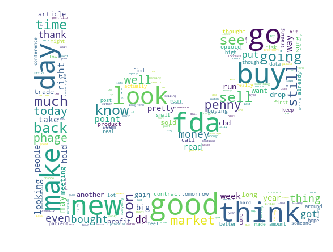

In [5]:
# Weeks up
text = ' '.join(df1.loc[df1.pnd_up==True,'com_text'])

# Add mask
mask = np.array(Image.open("./tmp/chart_line_up.jpg"))

# Create the cloud
cloud = WordCloud(background_color="white",
                      width=800,
                      height=600,
                      mask = mask
                     ).generate(text)
print("Up Weeks")

plt.imshow(cloud)
plt.axis("off")
plt.savefig('./output/wc_up.png',dpi=300)

Down Weeks


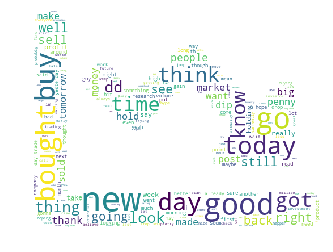

In [6]:
# Weeks down
text = ' '.join(df1.loc[df1.pnd_down==True,'com_text'])


# Add mask
mask = np.array(Image.open("./tmp/chart_line_down.jpg"))


# Create the cloud
cloud = WordCloud(background_color="white",
                      width=1500,
                      height=1000,
                      mask=mask
                     ).generate(text)
print("Down Weeks")
plt.imshow(cloud)
plt.axis("off")
plt.savefig('./output/wc_down.png',dpi=300)

Pre-Up Weeks


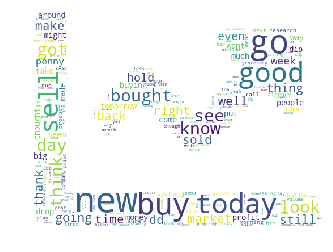

In [7]:
# Weeks pre-Up
text = ' '.join(df1.loc[df1.lead_pnd_up==True,'com_text'])

# Add mask
mask = np.array(Image.open("./tmp/chart_line_up.jpg"))


# Create the cloud
cloud = WordCloud(background_color="white",
                      width=1500,
                      height=1000,
                      mask=mask
                     ).generate(text)
print("Pre-Up Weeks")
plt.imshow(cloud)
plt.axis("off")
plt.savefig('./output/wc_pre_up.png',dpi=300)

Pre-Down Weeks


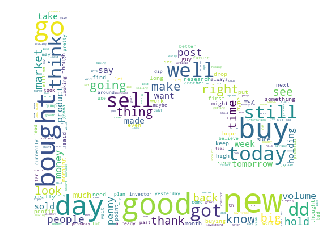

In [8]:
# Weeks pre-Down
text = ' '.join(df1.loc[df1.lead_pnd_down==True,'com_text'])

# Add mask
mask = np.array(Image.open("./tmp/chart_line_down.jpg"))


# Create the cloud
cloud = WordCloud(background_color="white",
                      width=1500,
                      height=1000,
                      mask=mask
                     ).generate(text)
print("Pre-Down Weeks")
plt.imshow(cloud)
plt.axis("off")
plt.savefig('./output/wc_pre_down.png',dpi=300)

## Sentiment analysis

Next we use TextBlob to identify positive and negative comments.

In [9]:
# A helper function
def getPositive(string):
    '''
    A helper function that takes a string and returns a polarity score from TextBlob
    
    Requirements: TextBlob
    '''
    
    s = textblob.TextBlob(string)
    
    return (s.polarity)

# Create a postivity score for each comment
df2 = df.copy()
df2['com_positive'] = df2['com_text'].apply(lambda x: getPositive(str(x)))

# Save for the use in presentation

df2.to_csv("./output/df.csv", index=False)

Let's see how positivity relates to weekly stock returns

Text(0.5,0,'Comments average positivity score')

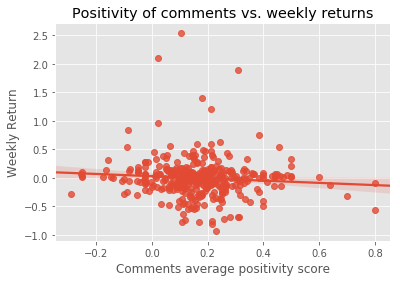

In [10]:
# Create a data frame for plotting
tmp_ = df2.loc[df2.com_positive!=0,:].groupby(['week', 'ticker']).agg({"com_positive":"mean", "return":"last"})
sns.regplot(tmp_["com_positive"], tmp_["return"])
plt.title("Positivity of comments vs. weekly returns")
plt.ylabel("Weekly Return")
plt.xlabel("Comments average positivity score")


There is no much correlation to talk about. We can conclude that in general comments are more positive than negative, and that with adverse stock returns the tone of comments become more positive. This can potentially imply either a wishful thinking of those board participants that are holding falling stocks, or an attempt to keep them from further falling by spreading good word about the company.

But if we are talking about a potential pump and dump practice, we are more concerned about the relation between comments positivity and the next week stock returns. 

Text(0.5,0,'Comments average positivity score')

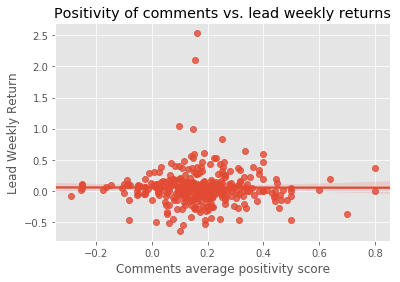

In [11]:
tmp_ = df2.loc[df2.com_positive!=0,:].groupby(['week', 'ticker']).agg({"com_positive":"mean", "lead_return":"last"})
sns.regplot(tmp_["com_positive"], tmp_["lead_return"])
plt.title("Positivity of comments vs. lead weekly returns")
plt.ylabel("Lead Weekly Return")
plt.xlabel("Comments average positivity score")

Return outliers skew the relationship. So let's look at the lead log returns instead. 

We also exclude observations with lead_returns equal to zero. Essentially, nothing has been happening to the stocks in those weeks. 

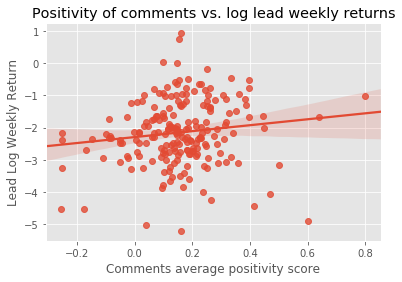

In [12]:
tmp_ = df2.loc[df2.com_positive!=0,:].groupby(['week', 'ticker']).agg({"com_positive":"mean", "lead_return":"last"})
tmp_['lead_return'] = tmp_['lead_return'].apply(lambda x: np.nan if x==0 else np.log(x)) 
sns.regplot(tmp_["com_positive"], tmp_["lead_return"])
plt.title("Positivity of comments vs. log lead weekly returns")
plt.ylabel("Lead Log Weekly Return")
plt.xlabel("Comments average positivity score")

# Save picture
plt.savefig("./output/positv_vs_logret.png", dpi=300)

Here we see that there is an upward sloping relationship between the lead log return of the stock and the positivity score of the comments.


## Simple logistic regression

We test our assumption by performing logistic regression analysis.

If the pump and dump activity is present on those internet boards, we are more likely to see the "pump" part of the cycle. The "dump" phase happens somewhat by nature and does not require active promotion in the media. 

Therefore, our first regression specification is in the form

$$Flag^{up}_{t+1} = \frac{1}{1 + e^{-(\beta_0 + \beta_1 N_p + \beta_2 PS)}}$$
, where 

$Flag^{up}_{t+1}$ - is leading a boolean variable indicating abnormal stock price increase

$N_p$ - weekly number of posts related to a certain ticker

$PS$ - average positivity score of posts related to the ticker

Or in terms of probability ($p$):

$$\log{\frac{p}{1-p}} = \beta_0 + \beta_1 N_p + \beta_2 PS$$



In [13]:
# Create data for the regression analysis

reg_data = df2.copy()
reg_data = reg_data.loc[:,['week','ticker', 'top_post', 'com_positive', 'lead_pnd_up']]


In [14]:
# Make a grouping

# Create a data frame with the flag
flag = reg_data.groupby(['week', 'ticker'])['lead_pnd_up'].last().reset_index()

# Create a dataframe with independent variables
reg_data_simple = reg_data.groupby(['week', 'ticker'])['com_positive'].agg({'count','mean'}).reset_index()
reg_data_simple = pd.merge(reg_data_simple, flag, on=['week', 'ticker'],\
                          how = "left")
reg_data_simple.head(10)

,week,ticker,mean,count,lead_pnd_up
0,201832,BVTK,0.253571,1,True
1,201832,BYOC,0.006009,7,False
2,201832,CRMD,0.106905,5,False
3,201832,DRUS,0.072998,6,False
4,201832,HIPH,0.006009,7,False
5,201832,JONE,0.118155,3,False
6,201832,KOOL,0.164141,2,False
7,201832,MLTC,0.006009,7,False
8,201832,NTLK,0.347768,2,False
9,201832,RSHN,0.092409,2,False


In [15]:
# Run a logistic regression

data = reg_data_simple.dropna()

X = data.loc[:,['count','mean']]
X.columns = ['Np', 'PS']
X = sm.add_constant(X)
y = data.loc[:,'lead_pnd_up'].astype(int)

model = smf.Logit(y,X)
result = model.fit()
result.summary()


Optimization terminated successfully.
         Current function value: 0.389552
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            lead_pnd_up   No. Observations:                  398
Model:                          Logit   Df Residuals:                      395
Method:                           MLE   Df Model:                            2
Date:                Wed, 31 Oct 2018   Pseudo R-squ.:                 0.01886
Time:                        13:18:44   Log-Likelihood:                -155.04
converged:                       True   LL-Null:                       -158.02
                                        LLR p-value:                   0.05078
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1064      0.215     -9.809      0.000      -2.527      -1.686
Np             0.0047      0.002      2.284      0.022       0.001       0.009
PS             1.0714      1.096      0.978      0.328      -1.076       3.219
==============================================================================
"""

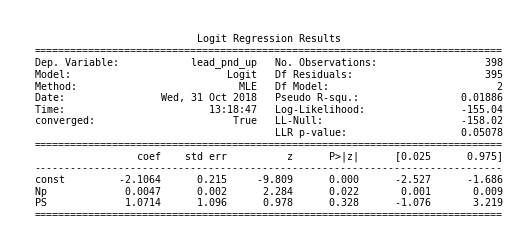

In [16]:
# Save output as csv

def modelToPNG(model, path):
    '''
    helper function to get a model summary output to a png image 
    '''
    plt.rc('figure', figsize=(8, 4))    
    plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 10}, fontproperties = 'monospace') 
    plt.axis('off')
    plt.savefig(path)

modelToPNG(result, "./output/logit_spec1.png")

As we can see, the regression coefficient of the positivity score is not statistically significant. 

We modify positivity score by changing it to 1 if it is positive, -1 if it is negative, and keeping it at 0 for neutral scores. 

In [17]:
data = reg_data_simple.dropna()

X = data.loc[:,['count','mean']]
X.columns = ['Np', 'PS']

X.loc[X.PS!=0,'PS'] = X.loc[X.PS!=0,'PS'].apply(lambda x: 1 if x>0 else -1)

X = sm.add_constant(X)
y = data.loc[:,'lead_pnd_up'].astype(int)

model = smf.Logit(y,X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.384579
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            lead_pnd_up   No. Observations:                  398
Model:                          Logit   Df Residuals:                      395
Method:                           MLE   Df Model:                            2
Date:                Wed, 31 Oct 2018   Pseudo R-squ.:                 0.03138
Time:                        13:18:48   Log-Likelihood:                -153.06
converged:                       True   LL-Null:                       -158.02
                                        LLR p-value:                  0.007017
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5234      0.354     -7.135      0.000      -3.217      -1.830
Np             0.0039      0.002      1.941      0.052   -3.91e-05       0.008
PS             0.7019      0.368      1.907      0.057      -0.019       1.423
==============================================================================
"""

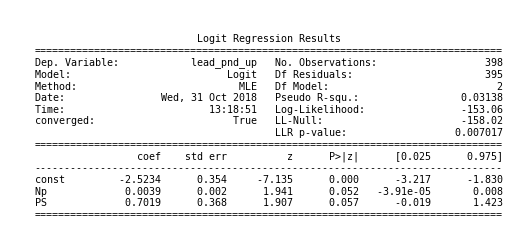

In [18]:
modelToPNG(result, "./output/logit_spec2.png")

This time both coefficients are significant at 10% confidence level. I believe that obtaining more data may increase the accuracy of the model. However, Reddit does not provide access to the whole archive of forum threads. Therefore, more data can be obtained by scraping later. I plan to attempt another scraping in 3-6 months.  

I also test the robustness of the findings, by adding current week return as another independent variable. This way we test a) if there is a correlation between weekly returns and ubnormal positive returns next week; b) we eliminate the influence of current returns on the posting activity.

In [19]:
# Create a data frame with the flag
reg_data = df2.copy()
flag = reg_data.groupby(['week', 'ticker'])[['lead_pnd_up','return']].last().reset_index()

# Create a dataframe with independent variables
reg_data_simple = reg_data.groupby(['week', 'ticker'])['com_positive'].agg({'count','mean'}).reset_index()
reg_data_simple = pd.merge(reg_data_simple, flag, on=['week', 'ticker'],\
                          how = "left")

data = reg_data_simple.dropna()

# Create independent vars
X = data.loc[:,['count','mean', 'return']]
X.columns = ['Np', 'PS', 'R']

X.loc[X.PS!=0,'PS'] = X.loc[X.PS!=0,'PS'].apply(lambda x: 1 if x>0 else -1)


X = sm.add_constant(X)
y = data.loc[:,'lead_pnd_up'].astype(int)

# Run regression
model = smf.Logit(y,X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.377292
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            lead_pnd_up   No. Observations:                  398
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            3
Date:                Wed, 31 Oct 2018   Pseudo R-squ.:                 0.04974
Time:                        13:18:53   Log-Likelihood:                -150.16
converged:                       True   LL-Null:                       -158.02
                                        LLR p-value:                  0.001294
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5356      0.353     -7.193      0.000      -3.227      -1.845
Np             0.0041      0.002      2.048      0.041       0.000       0.008
PS             0.6927      0.366      1.892      0.059      -0.025       1.410
R              0.9120      0.380      2.400      0.016       0.167       1.657
==============================================================================
"""

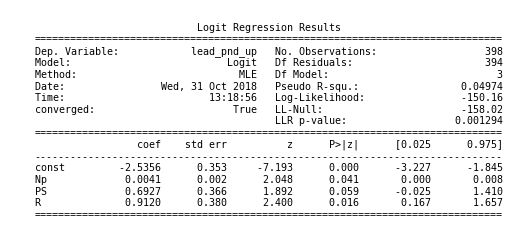

In [20]:
modelToPNG(result, "./output/logit_spec3.png")

I also make an attempt to evaluate if original posts have higher influence on the leading abnormal returns. 

I change the model specification to:

$$\log{\frac{p}{1-p}} = \beta_0 + \beta_1 (1-TP) N_p + \beta_2  (1-TP)  PS + \beta_3 TP * N_p + \beta_4 TP * PS$$ 

,where

$TP$ - a dummy variable 1 if it is an original post, 0 otherwise

In [21]:
# Create a more sophisticated model

# Create a data frame with the flag
flag = reg_data.groupby(['week', 'ticker'])['lead_pnd_up'].last().reset_index()

# Create a dataframe with independent variables
reg_data_2 = reg_data.groupby(['week', 'ticker','top_post'])['com_positive'].agg({'count','mean'}).reset_index()

reg_data_2 = pd.merge(reg_data_2, flag, on=['week', 'ticker'],\
                          how = "left")

data = reg_data_2.dropna()

X = data.loc[:,['count','mean', 'top_post']]
X.columns = ['Np', 'PS', 'TP']

X.loc[X.PS!=0,'PS'] = X.loc[X.PS!=0,'PS'].apply(lambda x: 1 if x>0 else -1)


# Calculate terms with top_post dummy
X['1mTPNp'] = (1-X.TP)*X.Np
X['1mTPPS'] = (1-X.TP)*X.PS
X['TPNp'] = X.TP*X.Np
X['TPPS'] = X.TP*X.PS

X = X[['1mTPNp', '1mTPPS', 'TPNp', 'TPPS']]

# Add constant
X = sm.add_constant(X)
y = data.loc[:,'lead_pnd_up'].astype(int)

# Run model
model = smf.Logit(y,X)
result = model.fit()
result.summary()




Optimization terminated successfully.
         Current function value: 0.402985
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            lead_pnd_up   No. Observations:                  658
Model:                          Logit   Df Residuals:                      653
Method:                           MLE   Df Model:                            4
Date:                Wed, 31 Oct 2018   Pseudo R-squ.:                 0.02385
Time:                        13:19:00   Log-Likelihood:                -265.16
converged:                       True   LL-Null:                       -271.64
                                        LLR p-value:                   0.01149
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1356      0.190    -11.233      0.000      -2.508      -1.763
1mTPNp         0.0043      0.002      2.023      0.043       0.000       0.009
1mTPPS         0.2567      0.235      1.093      0.275      -0.204       0.717
TPNp           0.0878      0.039      2.252      0.024       0.011       0.164
TPPS           0.3056      0.243      1.259      0.208      -0.170       0.781
==============================================================================
"""

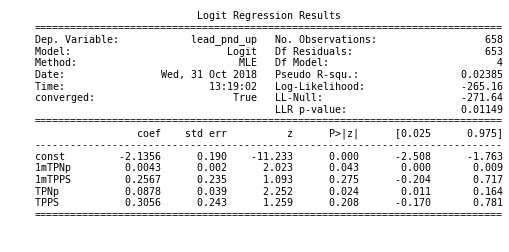

In [22]:
modelToPNG(result, "./output/logit_spec4.png")

We can see that the significance of the number of posts/comments increased. Moreover, original posts have higher influence on the leading abnormal returns. 

However, we cannot make any conclusion about the positivity score. And again, I think that more data and better sentiment analysis algorithm may yield more significant results. 


## Conclusion

The presented analysis shows that there may be some evidence that posts on Reddit penny stocks boards may effect abnormally high returns for these stocks in the week, following the week of observation. 

However, it is important to remember that correlation is not equal to causation, and that the pump and dump practice is classified as such, only when a perpetrator holds the stocks and profits from there price increase. Such determination can only be made by the SEC and other authorities that have access to individuals' stock holdings. After all, anyone can be genuinely enthusiastic about a stock and express his/her enthusiasm.

More data should be collected to perform more accurate analysis.